# Feature Detection

In [1]:
# import methods from FIA python script
from FIA import *
import os

## Library Preparation

In [2]:
# set path to your mzML files and workfolder
data_dir = "../data/example data/exampleA_ecolistrains"
run_dir = "../runs/exampleA"

data_dir = os.path.normpath(os.path.join(os.getcwd(), data_dir))
run_dir = os.path.normpath(os.path.join(os.getcwd(), run_dir))

clean_dir(run_dir)

'/mnt/Data/Uni/Nextcloud/aktuelles_Semester/Thesis/MStoML/runs/exampleA'

In [3]:
centroid_dir = centroid_batch(data_dir, run_dir, file_ending=".mzXML")

In [4]:
merge_dir = merge_batch(centroid_dir, run_dir, file_ending=".mzML")

## Untargeted

In [5]:
feature_maps = untargeted_features_detection(centroid_dir, ".mzML", 
                                            mass_error_ppm=10.0, noise_threshold_int=1000.0,
                                            width_filtering="fixed", isotope_filtering_model="none", remove_single_traces="true",
                                            mz_scoring_by_elements="false", report_convex_hulls="true")

Progress of 'mass trace detection':
-- done [took 1.05 s (CPU), 0.16 s (Wall)] -- 
Progress of 'elution peak detection':
-- done [took 1.34 s (CPU), 0.18 s (Wall)] -- 
Progress of 'assembling mass traces to features':
-- done [took 15.10 s (CPU), 2.47 s (Wall)] -- 
Progress of 'mass trace detection':
-- done [took 1.63 s (CPU), 1.40 s (Wall)] -- 
Progress of 'elution peak detection':
-- done [took 6.41 s (CPU), 0.85 s (Wall)] -- 
Progress of 'assembling mass traces to features':
-- done [took 09:16 m (CPU), 01:34 m (Wall)] -- 
Progress of 'mass trace detection':
-- done [took 0.97 s (CPU), 0.19 s (Wall)] -- 
Progress of 'elution peak detection':
-- done [took 1.54 s (CPU), 0.21 s (Wall)] -- 
Progress of 'assembling mass traces to features':
-- done [took 16.03 s (CPU), 2.55 s (Wall)] -- 
Progress of 'mass trace detection':
-- done [took 1.75 s (CPU), 1.74 s (Wall)] -- 
Progress of 'elution peak detection':
-- done [took 10.15 s (CPU), 1.37 s (Wall)] -- 
Progress of 'assembling mass tra

In [6]:
feature_maps = align_retention_times(feature_maps, 
                                    max_num_peaks_considered=-1,      # -1 -> consider infinite/all peaks
                                    max_mz_difference=10.0,
                                    mz_unit="ppm")

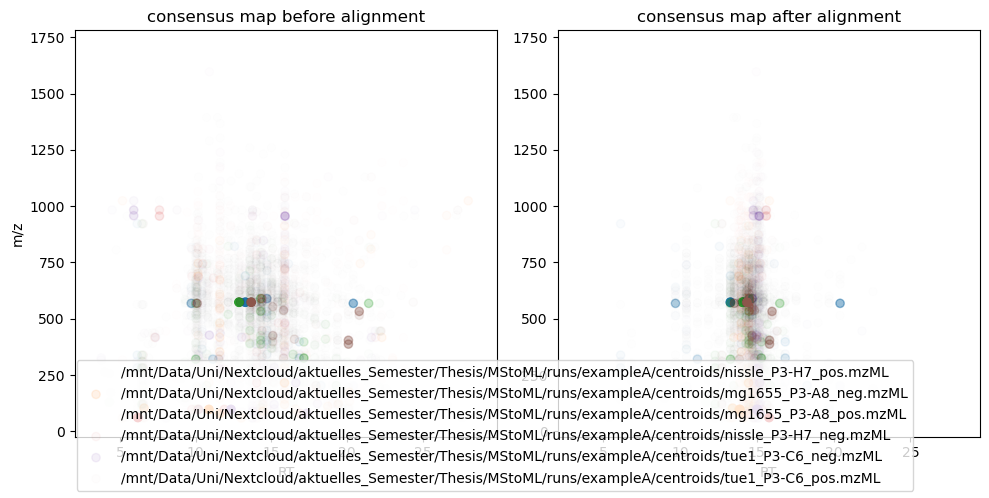

In [7]:
plot_feature_map_rt_alignment(feature_maps)

In [ ]:
pos_adducts = [b"H:+:0.8", b"Na:+:0.05", b"NH4:+:0.05", b"H-1O-1:+:0.05", b"H-3O-2:+:0.05"]
neg_adducts = [b"H:-:0.8", b"Na:-:0.05", b"NH4:-:0.05", b"H-1O-1:-:0.05", b"H-3O-2:-:0.05"]
feature_maps = detect_adducts(feature_maps, potential_adducts=pos_adducts + neg_adducts)

In [ ]:
store_feature_maps(feature_maps, "untargeted_features")

## Targeted

#### From mass

In [ ]:
feature_maps = untargeted_features_detection(run_dir, ".mzML", 
                                            mass_error_ppm=10.0, noise_threshold_int=1000.0,
                                            width_filtering="fixed", isotope_filtering_model="none", remove_single_traces="true",
                                            mz_scoring_by_elements="false", report_convex_hulls="true")

In [ ]:
feature_maps = align_retention_times(feature_maps, 
                                    max_num_peaks_considered=-1,      # -1 -> consider infinite/all peaks
                                    max_mz_difference=10.0,
                                    mz_unit="ppm")

In [ ]:
plot_feature_map_rt_alignment(feature_maps)

In [ ]:
consensus_map = consensus_features_linking(feature_maps, feature_grouper="KD")

In [ ]:
mass_search_df = accurate_mass_search(consensus_map, "../runs/tr1", "tmp",
 "PositiveAdducts.tsv", "NegativeAdducts.tsv", "HMDBMappingFile.tsv", "HMDB2StructMapping.tsv", ionization_mode="negative")

In [ ]:
cm_df = consensus_map_to_df(consensus_map)
filtered_cm_df = filter_consensus_map_df(cm_df, max_missing_values=1, min_feature_quality=0.8)
imputed_cm_df = impute_consensus_map_df(filtered_cm_df, n_nearest_neighbours=2)

In [ ]:
id_df = consensus_map_df_to_id_df(imputed_cm_df, mass_search_df, "../runs/tr1/results")

In [ ]:
plot_id_df(id_df)

#### From mass, charge & retention time

In [ ]:
mt = define_metabolite_table("../databases/compounds.tsv", [50.0, 3000.0])
len(mt)

In [ ]:
fm = feature_detection_targeted("../runs/tr_example/centroided_experiment.MzML", mt[0:100], mz_window=5.0, rt_window=200.0, peak_width=3.0)

In [ ]:
oms.FeatureXMLFile().store("../runs/tr_example/targeted.featureXML", fm)